In [1]:
#importing data science libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import itertools
import random

#importing visualization libraries
import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
#importing tensorflow libraries
# Tensorflow Libraries
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.optimizers import Adam

In [3]:
# System libraries
from pathlib import Path
import os.path

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
import shutil
import os

In [5]:
orignal_folder = r"C:/Users/shruti/OneDrive/Documents/healthy-and-bleached-corals-image-classification"
#train_folder = r"C:/Users/shruti/OneDrive/Documents/healthy-and-bleached-corals-image-classification/train"
#test_folder = r"C:/Users/shruti/OneDrive/Documents/healthy-and-bleached-corals-image-classification/test"
#validation_folder = r"C:/Users/shruti/OneDrive/Documents/healthy-and-bleached-corals-image-classification/validation"

In [7]:
#os.mkdir(train_folder)
#os.mkdir(test_folder)
#os.mkdir(validation_folder)

In [8]:
import os
from PIL import Image

def validate_images(directory):
    corrupted_files = []
    
    # Walk through directory and sub-directories
    for dirpath, _, filenames in os.walk(orignal_folder):
        print(f"Scanning directory: {dirpath}")
        
        for image_file in filenames:
            # Check for common image extensions
            if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
                image_path = os.path.join(dirpath, image_file)
                try:
                    with Image.open(image_path) as img:
                        img.verify()
                except Exception as e:
                    corrupted_files.append(image_path)
                    print(f"Error with {image_path}: {e}")
    
    return corrupted_files

# Example usage:
directory = "C:/Users/shruti/OneDrive/Documents/healthy-and-bleached-corals-image-classification"  # Make sure to change to YOUR directory!
corrupted_images = validate_images(directory)
if corrupted_images:
    print(f"Found {len(corrupted_images)} corrupted images.")
else:
    print("All images are valid!")

Scanning directory: C:/Users/shruti/OneDrive/Documents/healthy-and-bleached-corals-image-classification
Scanning directory: C:/Users/shruti/OneDrive/Documents/healthy-and-bleached-corals-image-classification\bleached_corals
Scanning directory: C:/Users/shruti/OneDrive/Documents/healthy-and-bleached-corals-image-classification\healthy_corals
All images are valid!


In [9]:
def convert_path_to_df(orignal_folder):
    image_dir = Path("C:/Users/shruti/OneDrive/Documents/healthy-and-bleached-corals-image-classification")

    # Get filepaths and labels
    filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.jpeg')) + list(image_dir.glob(r'**/*.PNG'))

    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df

image_df = convert_path_to_df(orignal_folder)

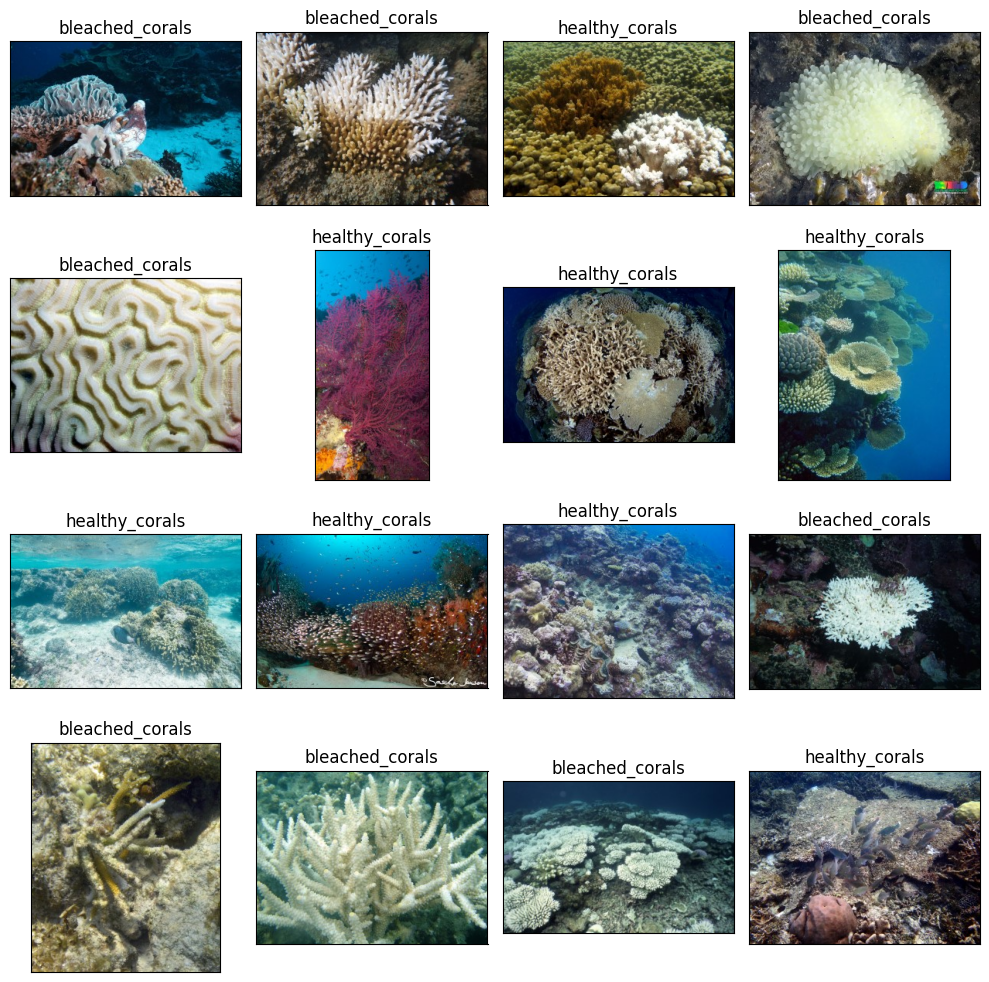

In [10]:
# Display 16 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
plt.tight_layout()
plt.show()

In [11]:
root_path = r"C:/Users/shruti/OneDrive/Documents/healthy-and-bleached-corals-image-classification"

# Initialize empty lists to store the information
sizes = []
resolutions = []
color_distributions = []

# Iterate over each image file in each subdirectory
for dirpath, dirnames, filenames in os.walk(root_path):
    for filename in filenames:
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Load the image file using OpenCV
            img_path = os.path.join(dirpath, filename)
            img = cv2.imread(img_path)

            # Extract the size of the image
            size = os.path.getsize(img_path)
            sizes.append(size)

            # Extract the resolution of the image
            resolution = img.shape[:2]
            resolutions.append(resolution)

            # Extract the color distribution of the image
            color_distribution = np.bincount(img.flatten(), minlength=256)
            color_distributions.append(color_distribution)

# Convert the lists to numpy arrays for easier manipulation
sizes = np.array(sizes)
resolutions = np.array(resolutions)
color_distributions = np.array(color_distributions)

In [12]:
sizes

array([ 32561,  30293,  22059,  24093,  33814,  27893,  33958,  33415,
        35069, 316391,  25811,  29226,  32861,  27829,  22388,  23913,
        23444,  24901,  31372,  28868,  25531,  23768,  21879,  28338,
        23743,  39533,  28972,  25305,  29140,  36753,  31360,  26489,
        39640,  27774,  37724,  37651,  35710,  30647,  31796,  32139,
        31404,  19433,  22563,  24702,  20048,  25541,  24977,  24790,
        24848,  24517,  25505,  27450,  27632,  34798,  31851,  27834,
        29024,  27208,  22900,  27699,  25719,  36799,  32805,  26621,
        31747,  28324,  25407,  20213,  26205,  22039,  26085,  21507,
        23474,  23678,  20414,  25095,  20083,  22901,  23997,  25805,
        24874,  25631,  22646,  21207,  24016,  26709,  28082,  21319,
        24056,  27300,  32257,  27914,  25508,  24684,  28440,  24534,
        16967,  29319,  22009,  22797,  22219,  30212, 143079,  22739,
        20224,  29457,  29189,  27227,  21835,  18977,  30745,  29710,
      

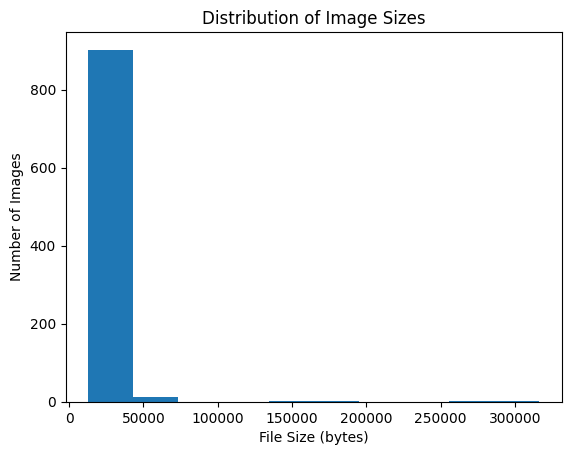

In [13]:
import matplotlib.pyplot as plt

# Plot a histogram of the image sizes
plt.hist(sizes)
plt.title("Distribution of Image Sizes")
plt.xlabel("File Size (bytes)")
plt.ylabel("Number of Images")
plt.show()

In [14]:
resolutions

array([[217, 300],
       [225, 300],
       [225, 300],
       ...,
       [225, 300],
       [225, 300],
       [200, 300]])

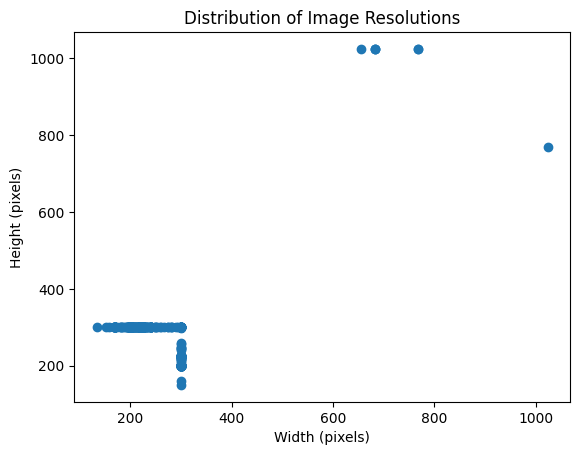

In [15]:
import matplotlib.pyplot as plt

# Plot a scatter plot of the image resolutions
plt.scatter(resolutions[:, 0], resolutions[:, 1])
plt.title("Distribution of Image Resolutions")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

In [16]:
color_distributions

array([[   22,     5,    12, ...,     0,     2,    12],
       [ 1010,   327,   298, ...,    43,    47,   457],
       [21704, 10624,  4395, ...,    21,    33,   269],
       ...,
       [  473,   211,   241, ...,   131,   129,   457],
       [ 1256,   542,   731, ...,   302,   296,   958],
       [  206,    98,   112, ...,    74,    57,   148]], dtype=int64)

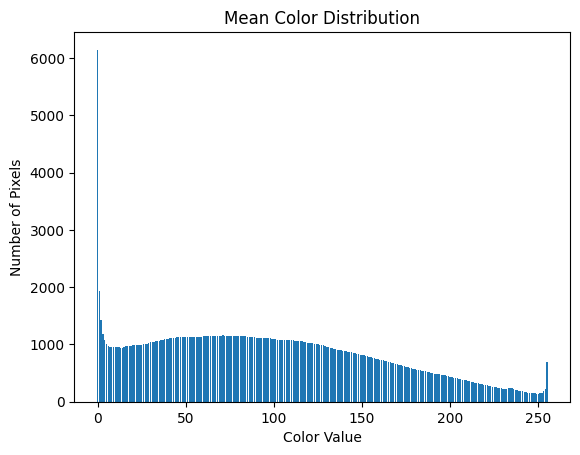

In [17]:
import matplotlib.pyplot as plt

# Calculate the mean color distribution across all images
mean_color_distribution = np.mean(color_distributions, axis=0)

# Plot a bar chart of the mean color distribution
plt.bar(np.arange(256), mean_color_distribution)
plt.title("Mean Color Distribution")
plt.xlabel("Color Value")
plt.ylabel("Number of Pixels")
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
# Separate in train and test data
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)

In [19]:
import tensorflow as tf
import keras
train_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input,
    validation_split=0.2
)

test_generator = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg19.preprocess_input
)

In [20]:
BATCH_SIZE = 32
TARGET_SIZE = (224, 224)

In [21]:
from keras.preprocessing import image
# Split the data into three categories.
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
     class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=TARGET_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 1181 validated image filenames belonging to 2 classes.
Found 295 validated image filenames belonging to 2 classes.
Found 369 validated image filenames belonging to 2 classes.


In [22]:
# Data Augmentation Step
augment = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.experimental.preprocessing.RandomFlip("horizontal"),
  layers.experimental.preprocessing.RandomRotation(0.1),
  layers.experimental.preprocessing.RandomZoom(0.1),
  layers.experimental.preprocessing.RandomContrast(0.1),
])

In [23]:
# Load the pretained model
pretrained_model = tf.keras.applications.vgg19.VGG19(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

In [24]:
# Create checkpoint callback
checkpoint_path = "corals_classification_model_checkpoint"
checkpoint_callback = ModelCheckpoint(checkpoint_path,
                                      save_weights_only=True,
                                      monitor="val_accuracy",
                                      save_best_only=True)

# Setup EarlyStopping callback to stop training if model's val_loss doesn't improve for 3 epochs
early_stopping = EarlyStopping(monitor = "val_loss", # watch the val loss metric
                               patience = 5,
                               restore_best_weights = True) # if val loss decreases for 3 epochs in a row, stop training

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-10)

In [25]:
from keras.callbacks import TensorBoard
from datetime import datetime
import os

def create_tensorboard_callback(log_dir, experiment_name):
    """
    Creates a TensorBoard callback instance to log training metrics.

    Args:
        log_dir: Directory where the logs will be saved.
        experiment_name: Name of the experiment.

    Returns:
        TensorBoard callback instance.
    """
    log_dir = os.path.join(log_dir, experiment_name, datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = TensorBoard(log_dir=log_dir)
    return tensorboard_callback


In [26]:
from keras.callbacks import TensorBoard
inputs = pretrained_model.input
x = augment(inputs)

x = Dense(128, activation='relu')(pretrained_model.output)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.45)(x)


outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer=Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    steps_per_epoch=len(train_images),
    validation_data=val_images,
    validation_steps=len(val_images),
    epochs=25,
    callbacks=[
        early_stopping,
        create_tensorboard_callback("training_logs","corals_classification"),
        checkpoint_callback,
        reduce_lr
    ]
)


Epoch 1/100
37/37 [==============================] - 1182s 32s/step - loss: 0.9066 - accuracy: 0.6139 - val_loss: 0.7431 - val_accuracy: 0.6780 - lr: 0.0010
Epoch 2/100
37/37 [==============================] - 1203s 33s/step - loss: 0.5535 - accuracy: 0.7629 - val_loss: 0.7247 - val_accuracy: 0.6915 - lr: 0.0010
Epoch 3/100
37/37 [==============================] - 1174s 32s/step - loss: 0.5112 - accuracy: 0.7790 - val_loss: 0.5111 - val_accuracy: 0.7695 - lr: 0.0010
Epoch 4/100
37/37 [==============================] - 1177s 32s/step - loss: 0.4679 - accuracy: 0.7993 - val_loss: 0.4143 - val_accuracy: 0.8068 - lr: 0.0010
Epoch 5/100
37/37 [==============================] - 629s 17s/step - loss: 0.3998 - accuracy: 0.8281 - val_loss: 0.3614 - val_accuracy: 0.8441 - lr: 0.0010
Epoch 6/100
37/37 [==============================] - 400s 11s/step - loss: 0.3708 - accuracy: 0.8425 - val_loss: 0.3545 - val_accuracy: 0.8475 - lr: 0.0010
Epoch 7/100
37/37 [==============================] - 391s 11

In [28]:
results = model.evaluate(test_images, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.35386
Test Accuracy: 89.43%


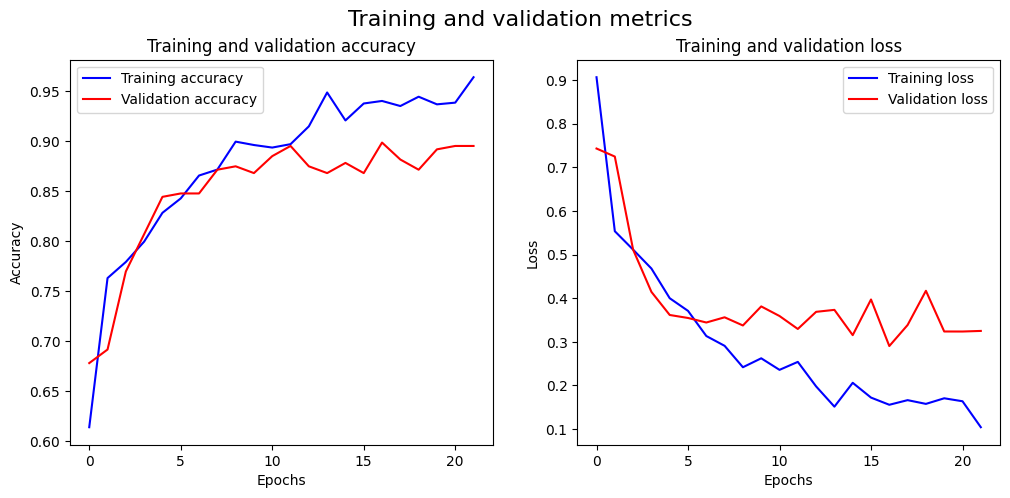

In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(epochs, accuracy, 'b', label='Training accuracy')
ax1.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
ax1.set_title('Training and validation accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()

ax2.plot(epochs, loss, 'b', label='Training loss')
ax2.plot(epochs, val_loss, 'r', label='Validation loss')
ax2.set_title('Training and validation loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()

fig.suptitle('Training and validation metrics', fontsize=16)
plt.show()


In [30]:
# Predict the label of the test_images
pred = model.predict(test_images)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_images.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]


# Display the result
print(f'The first 5 predictions: {pred[:5]}')

12/12 [==============================] - 84s 7s/step
The first 5 predictions: ['healthy_corals', 'bleached_corals', 'healthy_corals', 'healthy_corals', 'bleached_corals']


In [31]:
y_test = list(test_df.Label)
print(classification_report(y_test, pred))

                 precision    recall  f1-score   support

bleached_corals       0.92      0.88      0.90       194
 healthy_corals       0.87      0.91      0.89       175

       accuracy                           0.89       369
      macro avg       0.89      0.90      0.89       369
   weighted avg       0.90      0.89      0.89       369



In [32]:
report = classification_report(y_test, pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df

,precision,recall,f1-score,support
bleached_corals,0.918919,0.876289,0.897098,194.000000
healthy_corals,0.869565,0.914286,0.891365,175.000000
accuracy,0.894309,0.894309,0.894309,0.894309
macro avg,0.894242,0.895287,0.894231,369.000000
weighted avg,0.895513,0.894309,0.894379,369.000000


In [33]:
cm = confusion_matrix(y_test, pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[170  24]
 [ 15 160]]


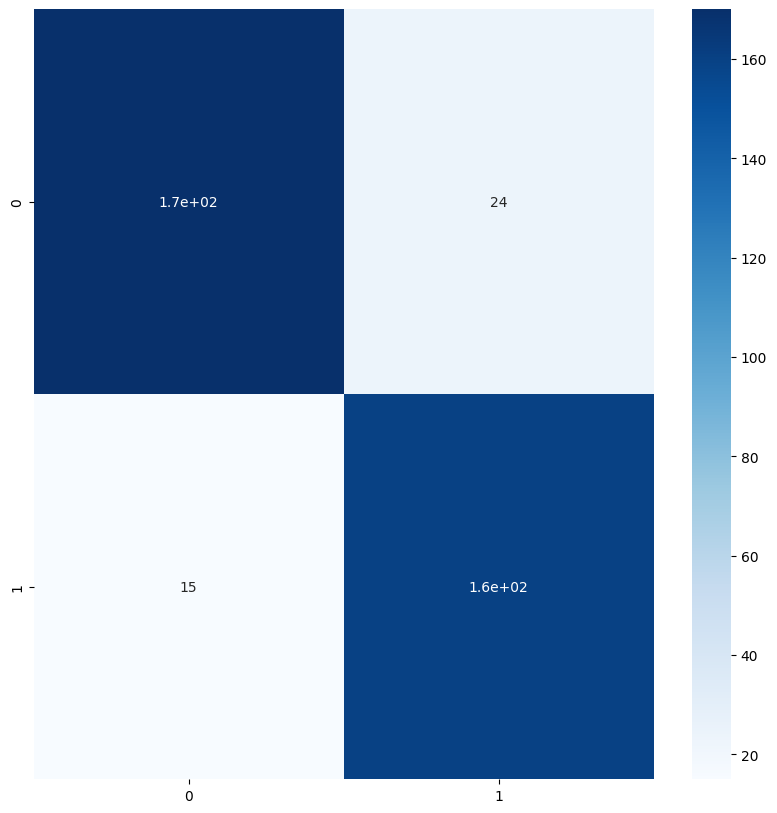

In [38]:
plt.figure(figsize=(10, 10))
cm=confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True , cmap = 'Blues')
plt.show()